In [131]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns

In [132]:
df= pd.read_csv("boston.csv")
df.shape
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [133]:
df.columns
df=df.fillna(0)

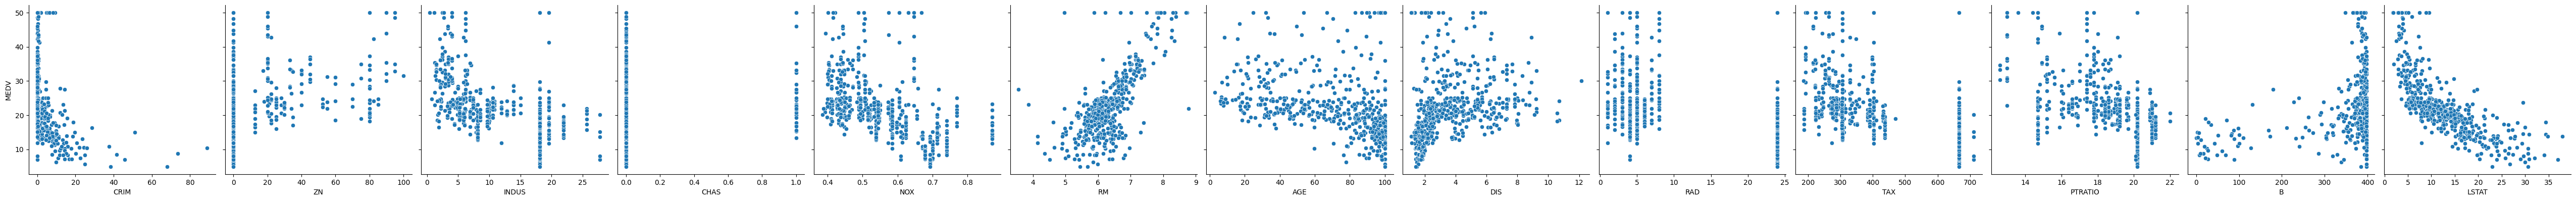

In [134]:
sns.pairplot(df, x_vars=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'], y_vars='MEDV', height=4, aspect=1, kind='scatter')
plt.show()

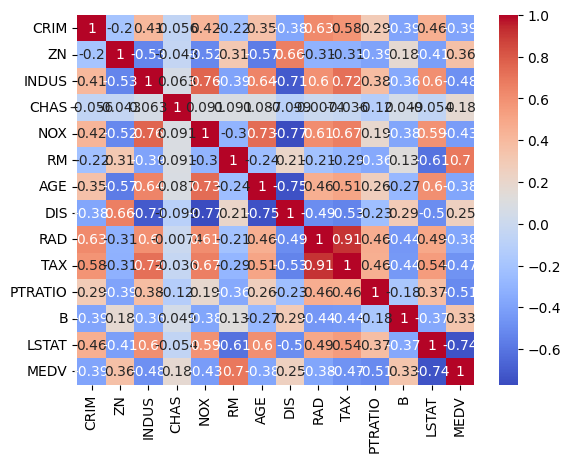

In [146]:
sns.heatmap(df.corr(), annot = True,cmap='coolwarm')
plt.show()

In [135]:
X=df.drop(["MEDV","CHAS"],axis=1)
#X=df["RM"]
Y=df["MEDV"]
df4=X.isna().sum()
df4
#X = X.values.reshape(-1,1)
#Y = Y.values.reshape(-1,1)
#X=X.values.reshape(-1,1)
Y=Y.values.reshape(-1,1)
X

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [136]:
#plt.scatter(df['CRIM'],df['MEDV'],color='blue',marker="*")
#plt.scatter(df['INDUS'],df['MEDV'],color='green',marker="+")
#plt.scatter(df['NOX'],df['MEDV'],color='red')
#plt.scatter(df['AGE'],df['MEDV'],color='purple',marker="*")

In [137]:
#plt.scatter(df['DIS'],df['MEDV'],color='purple',marker="+")
#plt.scatter(df['RAD'],df['MEDV'],color='green',marker="*")
#plt.scatter(df['TAX'],df['MEDV'],color='blue')
#plt.scatter(df['PTRATIO'],df['MEDV'],color='grey')


In [138]:
#plt.scatter(df['LSTAT'],df['MEDV'],color='red')
#plt.scatter(df['B'],df['MEDV'],color='green')
#plt.scatter(df['RM'],df['MEDV'],color='black')

In [139]:
x_train,x_test,y_test,y_train=train_test_split(X,Y,test_size=0.50,random_state=22)
print(x_train.shape)
print(y_train.shape)

(253, 12)
(253, 1)


In [140]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_test

array([[1.06474777e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.03190014e-01],
       [1.17544712e-03, 0.00000000e+00, 1.31598240e-01, ...,
        4.25531915e-01, 9.85803621e-01, 1.38696255e-01],
       [5.34427497e-03, 0.00000000e+00, 3.38343109e-01, ...,
        7.02127660e-01, 1.00000000e+00, 3.23717060e-01],
       ...,
       [2.43591368e-02, 0.00000000e+00, 2.81524927e-01, ...,
        8.93617021e-01, 9.48736699e-01, 5.29819695e-01],
       [9.55026337e-04, 3.47368421e-01, 6.30498534e-02, ...,
        6.17021277e-01, 9.91880579e-01, 1.38973648e-01],
       [1.27762692e-01, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 9.87770437e-01, 2.88488211e-02]])

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
lr=LinearRegression()
lr.fit(x_train,y_train)
PRE=lr.predict(x_test)
print("Regression Score :", r2_score(PRE,y_test))
print("MSE :", mean_squared_error(PRE,y_test))
print("MAE :", mean_absolute_error(PRE,y_test))

Regression Score : -34.05197182639511
MSE : 74.33455232858567
MAE : 6.466386413880206


In [142]:
print("Y-Intercept :", lr.intercept_)
print("Coefficients :", lr.coef_)

Y-Intercept : [29.82825068]
Coefficients : [[ 0.68380408  0.01757867 -3.22553089  0.52176245 -6.23896617 -2.35283477
  -5.20737338  0.65726376 -2.36138627 -2.22207935  0.74491898  5.12101134]]
